In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
import pandas as pd 
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [6]:
from utils.utils import make_bar_plot

In [32]:
base_color = '#3B3B3B'

In [70]:
data_dir = 'data/raw/'
data_file = 'dataset_SCL.csv'

# use pathlib to create a path to the data file 
data_path = Path(data_dir + data_file)

In [12]:
df = pd.read_csv(data_path,low_memory=False) 
df.head()


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


### Challenge 1: How is the data distributed? Did you find any noteworthy insight to share? What can you conclude about this?


In [6]:
df.isnull().sum().to_frame().T

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [7]:
df[df.isnull().any(axis=1)]


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6068,2017-01-19 11:00:00,200,SCEL,SPJC,LAW,2017-01-19 11:03:00,NaN,SCEL,SPJC,56R,19,1,2017,Jueves,I,Latin American Wings,Santiago,Lima


In [8]:
ratio = df.nunique() / df.shape[0]
display(ratio.to_frame().T)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,0.780752,0.010996,0.000015,0.000938,0.00044,0.920359,0.012697,0.000015,0.000924,0.000469,0.000455,0.000176,0.000029,0.000103,0.000029,0.000337,0.000015,0.000909


In [9]:
# since there is only one missing value we can drop the row 
df = df.dropna()

In [10]:
df.dtypes.to_frame().T


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,object,object,object,object,object,object,object,object,object,object,int64,int64,int64,object,object,object,object,object


In [11]:
# conver the date columns to datetime (Fecha-I	 and Fecha-O) 
df['Fecha-I'] = pd.to_datetime(df['Fecha-I'])
df['Fecha-O'] = pd.to_datetime(df['Fecha-O'])


In [12]:
df.dtypes.to_frame().T


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,datetime64[ns],object,object,object,object,datetime64[ns],object,object,object,object,int64,int64,int64,object,object,object,object,object


In [13]:
# create two new columns for the year and month  
df['year'] = df['Fecha-I'].dt.year
df['month'] = df['Fecha-I'].dt.month


## Univariate analysis 

In [15]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


I'll start looking for patterns in the data that may help to create decide the data transformation steps.


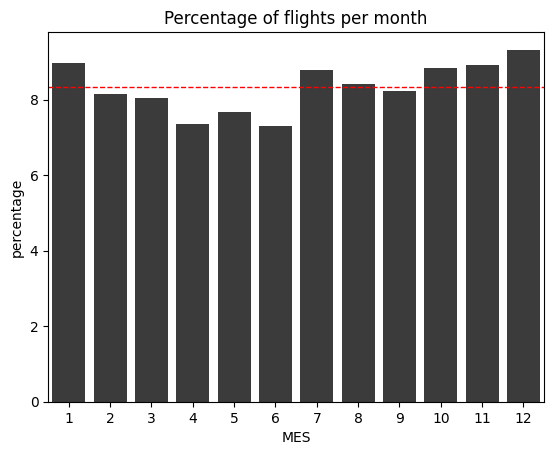

In [16]:
# From the above plot we can see that the number of flights is not evenly distributed over the months. 
# It seems to be some seasonal pattern, since the months with the highest number of flights are the consecutive (October, November, December and January) this could be due to the summer and vacation season in Chile 

make_bar_plot(df,'MES','Percentage of flights per month')

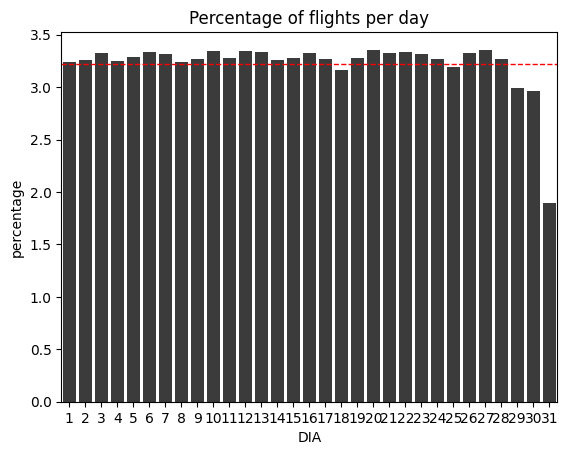

In [17]:
make_bar_plot(df,'DIA','Percentage of flights per day')

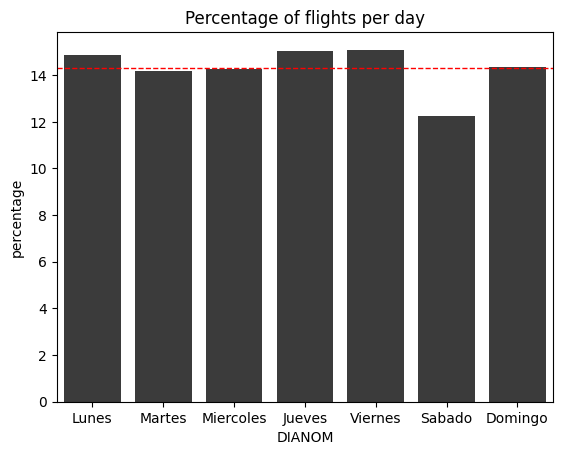

In [18]:
# For the days we can see an interesting pattern,
# the number of fligths on monday is the higher than the average which could be related to work, to take the most of the weekdays  
# a similar pattern is observed on thrusday and friday which could be related to travel for the weekend 

day_map = {'Lunes':1, 'Martes':2, 'Miercoles':3, 'Jueves':4, 'Viernes':5, 'Sabado':6, 'Domingo':7}

make_bar_plot(df,'DIANOM','Percentage of flights per day',day_map)

In [19]:
# The Scheduled fligths have 116 more unique values than the actual fligths, 
# this could have a correlation with the delay of the fligths 

print ("'Vlo-I ' has {} unique values".format(df['Vlo-I'].nunique()))
display (df['Vlo-I'].value_counts(dropna=False).to_frame().T)

print ("'Vlo-O ' has {} unique values".format(df['Vlo-O'].nunique()))
display (df['Vlo-O'].value_counts(dropna=False).to_frame().T)

'Vlo-I ' has 584 unique values


,174,11,116,150,704,162,164,118,172,170,...,1218,1906,1158,1154,1351,1121,1116,1065,1054,1234
Vlo-I,686,645,608,557,556,553,550,508,498,495,...,1,1,1,1,1,1,1,1,1,1


'Vlo-O ' has 861 unique values


,174,11,116,150,704,162,164,118,172,170,...,43R,8541,9623,1159,9622,1052,1051,1050,356,180.0
Vlo-O,649,646,608,517,514,512,508,507,466,452,...,1,1,1,1,1,1,1,1,1,1


In [21]:
# The variables 'Vlo-I' and 'Vlo-O' are constant, hence we will not use them in the rest of the analysis 

display (df['Ori-I'].value_counts(dropna=False).to_frame().T)

display (df['Ori-O'].value_counts(dropna=False).to_frame().T)


df = df.drop(['Vlo-I','Vlo-O'],axis=1) 

,SCEL
Ori-I,68206


,SCEL
Ori-O,68206


In [22]:
# At first glance we can see there are a few differences between Des-I and Des-O, 
# this could be relevant for stimated delays 

display (df['Des-I'].value_counts(dropna=False).to_frame().T)

display (df['Des-O'].value_counts(dropna=False).to_frame().T)

,SCFA,SPJC,SCCF,SCTE,SCIE,SCDA,SBGR,SAEZ,SABE,SCQP,...,SULS,SBCT,SAZS,SLCB,EGYP,SBFI,SPSO,SEQU,SEQM,SARI
Des-I,5787,5270,5145,4357,3995,3747,3570,3240,3094,2583,...,6,3,2,1,1,1,1,1,1,1


,SCFA,SPJC,SCCF,SCTE,SCIE,SCDA,SBGR,SAEZ,SABE,SCQP,...,SULS,SAWH,SBCT,SBFI,SAZS,SEQM,KIAD,SPSO,EGYP,SLCB
Des-O,5786,5270,5146,4357,3993,3747,3569,3241,3094,2589,...,6,6,3,2,2,2,1,1,1,1


In [47]:
# We can see that there are significant discrepancies between Emp-I and Emp-O

display (df['Emp-I'].value_counts(dropna=False).to_frame().T    )

display (df['Emp-O'].value_counts(dropna=False).to_frame().T)

,LAN,SKU,TAM,ARG,CMP,LAW,AVA,JAT,GLO,AAL,...,BAW,QFU,JMR,LRC,AUT,PUE,LXP,LPE,DSM,LNE
Emp-I,37611,14298,3049,1949,1850,1573,1152,1095,806,757,...,205,195,100,92,74,49,9,4,2,1


,LAN,LXP,SKU,TAM,ARG,CMP,JMR,LPE,JAT,AVA,...,AZA,KLM,LAP,BAW,QFA,AUT,PUE,56R,48O,TPU
Emp-O,20988,14558,14298,3046,1946,1850,1647,1214,1095,885,...,259,251,219,205,195,77,49,16,10,2


In [27]:
# For Fecha-I and Fecha-O we can see that Fecha-O has more unique values, which is expected since 
#  the programed flighs use to have more round times e.g. 12:00 vs a delayed flight that could be 12:03 


display (df['Fecha-I'].value_counts(dropna=False).to_frame().T)
display (df['Fecha-O'].value_counts(dropna=False).to_frame().T)

,2017-07-28 13:30:00,2017-03-26 18:00:00,2017-03-19 18:00:00,2017-11-14 09:30:00,2017-08-01 05:00:00,2017-08-05 08:00:00,2017-07-07 13:30:00,2017-07-25 13:30:00,2017-08-24 13:00:00,2017-07-31 05:00:00,...,2017-06-06 15:16:00,2017-06-28 06:53:00,2017-06-29 06:53:00,2017-06-30 06:53:00,2017-06-01 15:16:00,2017-06-02 15:16:00,2017-06-03 15:16:00,2017-06-04 15:16:00,2017-06-05 15:16:00,2017-12-31 14:55:00
Fecha-I,6,6,6,5,5,5,5,5,5,5,...,1,1,1,1,1,1,1,1,1,1


,2017-11-05 14:51:00,2017-05-19 07:01:00,2017-02-15 09:20:00,2017-03-01 17:10:00,2017-04-04 01:30:00,2017-04-24 12:09:00,2017-05-28 08:12:00,2017-11-06 08:06:00,2017-05-23 08:50:00,2017-01-24 08:53:00,...,2017-05-31 11:04:00,2017-05-01 17:10:00,2017-05-02 17:03:00,2017-05-03 17:03:00,2017-05-04 15:48:00,2017-05-05 17:02:00,2017-05-07 17:03:00,2017-05-08 17:06:00,2017-05-09 17:06:00,2017-12-31 15:04:00
Fecha-O,5,5,4,4,4,4,4,4,4,4,...,1,1,1,1,1,1,1,1,1,1


<AxesSubplot: >

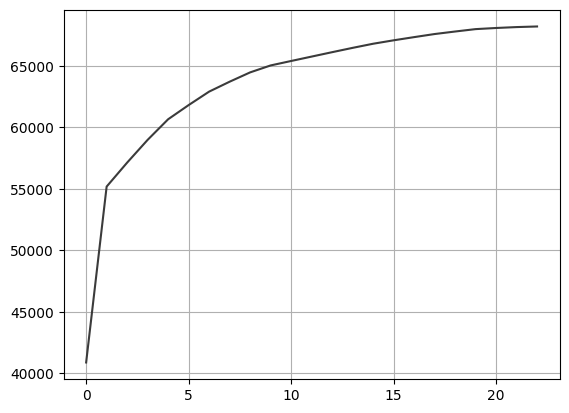

In [28]:
df['OPERA'].value_counts(dropna=False).sort_values(ascending=False).to_frame().T

df.groupby('OPERA').size().reset_index(name='counts').sort_values(by='counts', ascending=False).cumsum().reset_index()['counts'].plot(color='#3B3B3B',grid=True)


In [33]:
# For the origin airport we can see that all the flights are from Santiago (SCL)

display (df.groupby('SIGLAORI').size().reset_index(name='counts'))

display (df
.groupby('SIGLADES')
.size()
.reset_index(name='counts')
.sort_values(by='counts', ascending=False)
)


,SIGLAORI,counts
0,Santiago,68206


,SIGLADES,counts
8,Buenos Aires,6335
0,Antofagasta,5786
28,Lima,5270
9,Calama,5146
42,Puerto Montt,4357
...,...,...
12,Cataratas Iguacu,2
41,"Pisco, Peru",1
44,Puerto Stanley,1
15,Cochabamba,1


array([[<AxesSubplot: title={'center': 'counts'}>]], dtype=object)

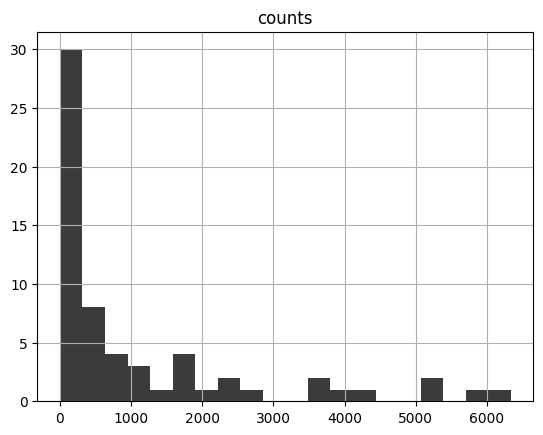

In [34]:
df.groupby('SIGLADES').size().reset_index(name='counts').hist(color=base_color,bins=20)

<AxesSubplot: >

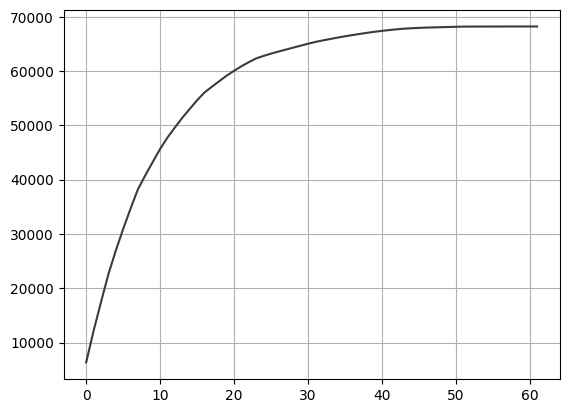

In [38]:
# from the below plot we can see that the top 10 destinations account for about 60% of the total flights
df.groupby('SIGLADES').size().reset_index(name='counts').sort_values(by='counts', ascending=False).cumsum().reset_index()['counts'].plot(color=base_color,grid=True)
# In relation to the target variable it can be expected that on average the delay on the frequent flights is lower than the delay on the less frequent flights. 

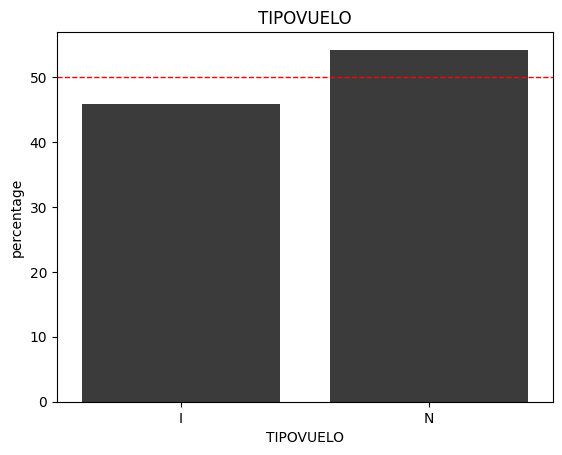

In [39]:
# Regarding the type of flight we can see that the majority of the flights are domestic flights (Nacional)
# but the percentage of international flights is close to half of the domestic flights.
df['TIPOVUELO'].value_counts(dropna=False).to_frame().T
make_bar_plot(df, 'TIPOVUELO', 'TIPOVUELO', key_map={})


## Challenge 2: 

Generate the following additional columns. Please export them to a CSV file named synthetic_features.csv:


* high_season : 1 if Date-I is between Dec-15 and Mar-3, or Jul-15 and Jul-31, or Sep-11 and Sep-30, 0 otherwise.
* min_diff : difference in minutes between Date-O and Date-I .
* delay_15 : 1 if min_diff > 15, 0 if not.
* period_day : morning (between 5:00 and 11:59), afternoon (between 12:00 and 18:59) and night (between 19:00 and 4:59), based
onDate-I .




In [57]:
# create high_season : 1 if Date-I is between Dec-15 and Mar-3, or Jul-15 and Jul-31, or Sep-11 and Sep-30, 0 otherwise. 

df['high_season'] = 0
df.loc[(df['Fecha-I'] >= '2015-12-15') & (df['Fecha-I'] <= '2016-03-03'), 'high_season'] = 1
df.loc[(df['Fecha-I'] >= '2015-07-15') & (df['Fecha-I'] <= '2015-07-31'), 'high_season'] = 1
df.loc[(df['Fecha-I'] >= '2015-09-11') & (df['Fecha-I'] <= '2015-09-30'), 'high_season'] = 1


# convert df['Fecha-O'] and  df['Fecha-I'] to datetime format 
df['Fecha-O'] = pd.to_datetime(df['Fecha-O'])
df['Fecha-I'] = pd.to_datetime(df['Fecha-I'])

# min_diff : difference in minutes between Date-O and Date-I . 
df['min_diff'] = (df['Fecha-O'] - df['Fecha-I']).dt.total_seconds() / 60

# delay_15 : 1 if min_diff > 15, 0 if not. 
df['delay_15'] = 0
df.loc[df['min_diff'] > 15, 'delay_15'] = 1

# period_day : morning (between 5:00 and 11:59), afternoon (between 12:00 and 18:59) and night (between 19:00 and 4:59), based onDate-I .
df['period_day'] = 'morning'

In [58]:
# list of high_season min_diff delay_15 period_day

synthetic_features_names =  ['high_season', 'min_diff', 'delay_15', 'period_day']

In [60]:
synthetic_features = df[synthetic_features_names]

synthetic_features

,high_season,min_diff,delay_15,period_day
0,0,3.0,0,morning
1,0,9.0,0,morning
2,0,9.0,0,morning
3,0,3.0,0,morning
4,0,-2.0,0,morning
...,...,...,...,...
68201,0,46.0,1,morning
68202,0,16.0,1,morning
68203,0,40.0,1,morning
68204,0,13.0,0,morning


In [74]:
df = df.drop(synthetic_features_names,axis=1)  

In [77]:
df.to_csv('data/interim/dataset_SCL.csv', index=False)
synthetic_features.to_csv('data/interim/synthetic_features_SCL.csv', index=False)